In [3]:
import chem_ocean.ocean_plt as oc_plt
import chem_ocean.ocean_analysis as oc_an

from chem_ocean import ocean_data as oc_data
from chem_ocean.ocean_plt_util import make_section, subplot_labels

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from scipy import stats
title_sz = 27
axis_sz = 22
tick_sz = 21

%matplotlib inline

In [5]:
minlat, minlon = -40, -30
_x, _y, _d, _feat_data, _basemap, _xLab, _yLab, _latLon_params = oc_data.get_column([minlat, minlat+2], [minlon, minlon+2], ['nitrate'])

In [ ]:
path = 'demo_plots/'
minlat, minlon = -40, -30
fig, (ax1) = oc_plt.plotRaw(minlat, minlat+2, minlon, minlon+2, ['nitrate'], 'column')
plt.savefig(path+'nitrate_column_40s30w.png', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)

fig, (ax1) = oc_plt.plotRaw(-70, 0, -32, -32, ['nitrate'], 'NS_section')
plt.savefig(path+'nitrate_section_70-0s32w.png', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)

fig, (ax1) = oc_plt.plotRaw(-70, 50, -60, 30, ['nitrate'], 'plan', depth = 2000)
plt.savefig(path+'nitrate_plan_70s-50n_60w-30e_2000m.png', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)

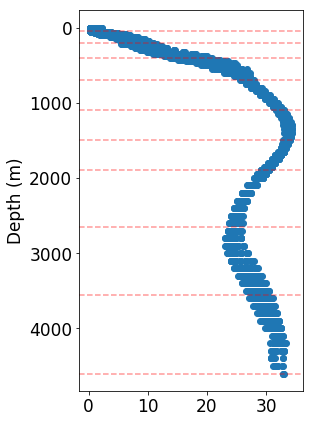

In [4]:
_x, _y, _d, _feat_data, _basemap, _xLab, _yLab, _latLon_params = oc_data.get_column([-40, -35], [-30, -25], ['nitrate'])
intervals, fig, ax =oc_an.column_split_ptest(_feat_data, _d)

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


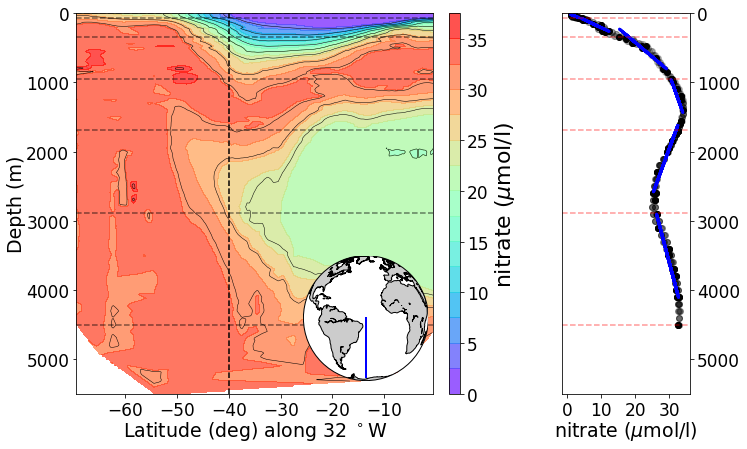

In [5]:
fig, (ax1, ax2) = oc_plt.plotRaw(-70, 0, -32, -32, ['nitrate'], 'NS_section', add_profile = True)
intervals, fig, ax2 = oc_an.column_split_byslope(_feat_data, _d, exist_plt = (fig, ax2), depth_lim = ax1.get_ylim())

# add annotation from profile to section plot
ax1.axvline(minlat, color='k', linestyle='--')
for depth in intervals:
    ax1.axhline(depth, color='k', linestyle='--', alpha = .5)

0.1684706211090088


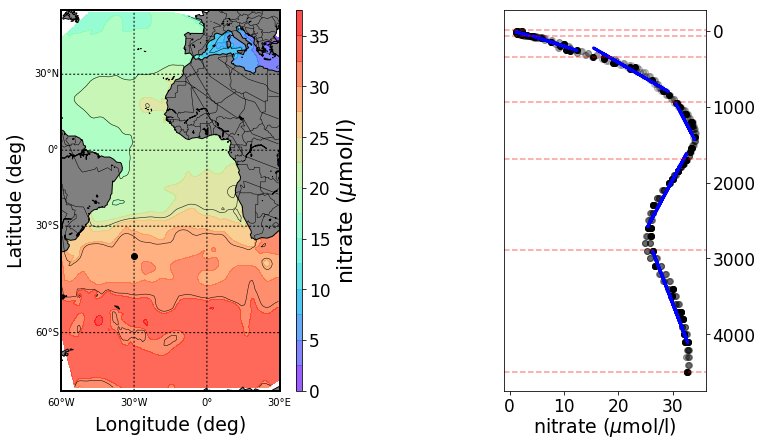

In [6]:
fig, (ax1, ax2) = oc_plt.plotRaw(-70, 50, -60, 30, ['nitrate'], 'plan', depth = 2000, add_profile = True, plot_pt = (minlat, minlon))
intervals, fig, ax2 = oc_an.column_split_byslope(_feat_data, _d, exist_plt = (fig, ax2))#, depth_lim = (min(_d), max(_d)))